In [1]:
import pandas as pd

## Get data and drop unneceesary columns and rows with missing values

In [63]:
customers = pd.read_csv('Customers.csv')
customers =customers.set_index('ID')
customers = customers.drop(columns=['Var_1', 'Segmentation'])
customers = customers.dropna()
customers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
ID,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
461319,Male,Yes,56,No,Artist,0.0,Average,2.0
460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0
...,...,...,...,...,...,...,...,...
463002,Male,Yes,41,Yes,Artist,0.0,High,5.0
464685,Male,No,35,No,Executive,3.0,Low,4.0
465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0


## Encode columns acccordingly 

In [64]:
train = customers.copy()

gender_encode = pd.get_dummies(train['Gender'])
train = train.drop('Gender', axis = 1)
train = train.join(gender_encode)

train['Ever_Married'] = train['Ever_Married'].replace({'Yes': 1, 'No': 0})

train['Graduated']= train['Graduated'].replace({'Yes': 1, 'No': 0})

profession_encode = pd.get_dummies(train['Profession'])
train = train.drop('Profession', axis = 1)
train = train.join(profession_encode)

spending_score_map = {'Low': 0, 'Average': 1, 'High': 2}
train['Spending_Score'] = train['Spending_Score'].map(spending_score_map)
train

,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Female,Male,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
ID,,,,,,,,,,,,,,,,,
462809,0,22,0,1.0,0,4.0,0,1,0,0,0,0,0,1,0,0,0
466315,1,67,1,1.0,0,1.0,1,0,0,0,1,0,0,0,0,0,0
461735,1,67,1,0.0,2,2.0,0,1,0,0,0,0,0,0,0,1,0
461319,1,56,0,0.0,1,2.0,0,1,1,0,0,0,0,0,0,0,0
460156,0,32,1,1.0,0,3.0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463002,1,41,1,0.0,2,5.0,0,1,1,0,0,0,0,0,0,0,0
464685,0,35,0,3.0,0,4.0,0,1,0,0,0,0,1,0,0,0,0
465406,0,33,1,1.0,0,1.0,1,0,0,0,0,0,0,1,0,0,0


## Find optimal number of clusters

Text(0.5, 1.0, 'Elbow curve')

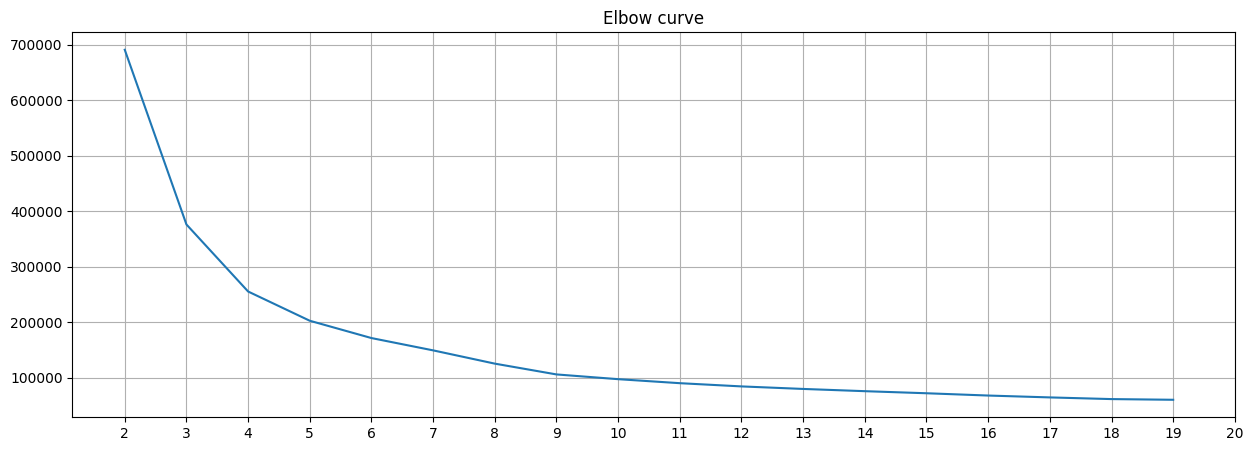

In [78]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(train)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.xticks(range(2, 21, 1))
plt.grid(True)
plt.title('Elbow curve')

## We will be using 4 clusters for our analysis

In [88]:
k = 4

model = KMeans(n_clusters=k, random_state=1)
model.fit(train)

clusters = model.predict(train)
customer_clusters = pd.DataFrame(clusters, index=train.index, columns=["Cluster"])

customer_segmentation = customer_clusters.join(customers)
customer_segmentation


,Cluster,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
ID,,,,,,,,,
462809,0,Male,No,22,No,Healthcare,1.0,Low,4.0
466315,3,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
461735,3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
461319,1,Male,Yes,56,No,Artist,0.0,Average,2.0
460156,0,Male,No,32,Yes,Healthcare,1.0,Low,3.0
...,...,...,...,...,...,...,...,...,...
463002,2,Male,Yes,41,Yes,Artist,0.0,High,5.0
464685,2,Male,No,35,No,Executive,3.0,Low,4.0
465406,2,Female,No,33,Yes,Healthcare,1.0,Low,1.0


In [99]:
customer_segmentation[customer_segmentation['Cluster'] == 0]

,Cluster,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
ID,,,,,,,,,
462809,0,Male,No,22,No,Healthcare,1.0,Low,4.0
460156,0,Male,No,32,Yes,Healthcare,1.0,Low,3.0
464041,0,Female,No,26,Yes,Engineer,1.0,Low,3.0
464942,0,Male,No,19,No,Healthcare,4.0,Low,4.0
466865,0,Female,No,32,No,Homemaker,9.0,Low,5.0
...,...,...,...,...,...,...,...,...,...
465285,0,Female,Yes,32,No,Engineer,9.0,Low,4.0
465667,0,Male,No,23,No,Healthcare,1.0,Low,3.0
461291,0,Male,No,18,No,Healthcare,0.0,Low,2.0


In [120]:
customer_segmentation[customer_segmentation['Cluster'] == 1].iloc[[1633]]

,Cluster,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
ID,,,,,,,,,
459889,1,Male,Yes,63,Yes,Homemaker,8.0,Average,3.0
